In [1]:
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy

### The basic representation of an audio signal is in the time domain.

In [2]:
x, sr = librosa.load('audio/piano-melody.wav')
print('Array dimensions {}'.format(x.shape))
print('Frequency {} Hz'.format(sr))

Array dimensions (224760,)
Frequency 22050 Hz


**sr** = sampling rate or sampling frequency (fs). <br>
It is the rate at which a computer captures audio data. <br>
44100 Hz is the sampling rate used in CD recordings.

In [3]:
ipd.Audio(x, rate=sr)

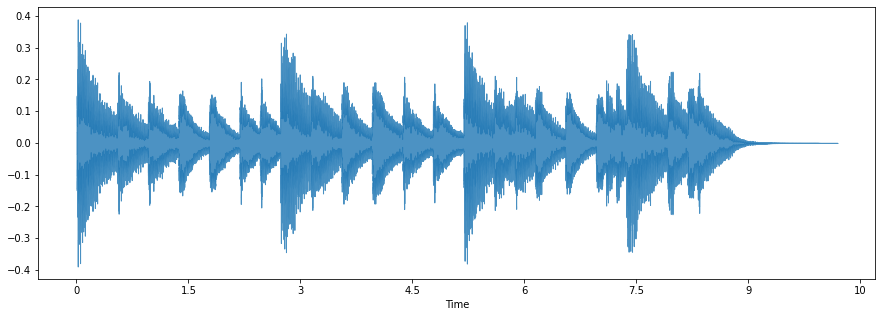

In [15]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sr, alpha=0.8)

### Pure tone, C6

In [19]:
T = 2.0 # seconds
f0 = 1047.0
sr = 22050
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.1*np.sin(2*np.pi*f0*t)
print('Dimensions {}'.format(x.shape))

Dimensions (44100,)


In [41]:
ipd.Audio(x, rate=sr)

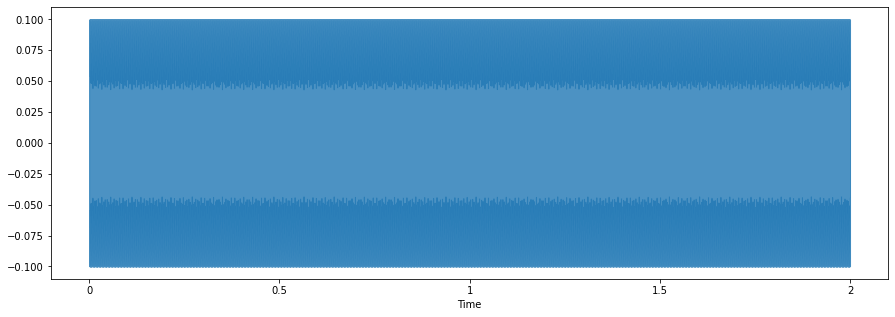

In [20]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sr, alpha=0.8)

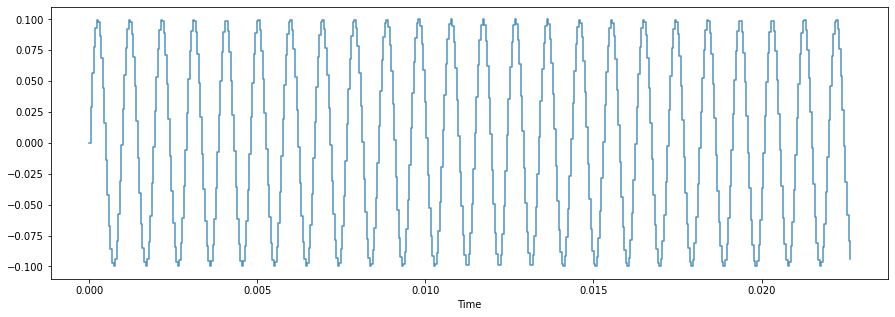

In [37]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x[0:500], sr=sr, alpha=0.8)

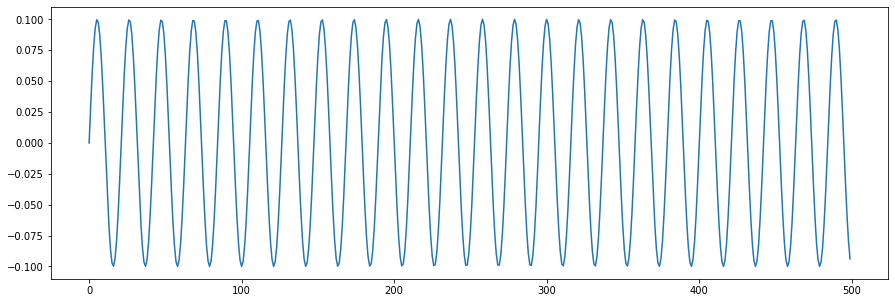

In [38]:
plt.figure(figsize=(15, 5))
plt.plot(x[0:500])
plt.show()

**Spectrum of the pure tone**

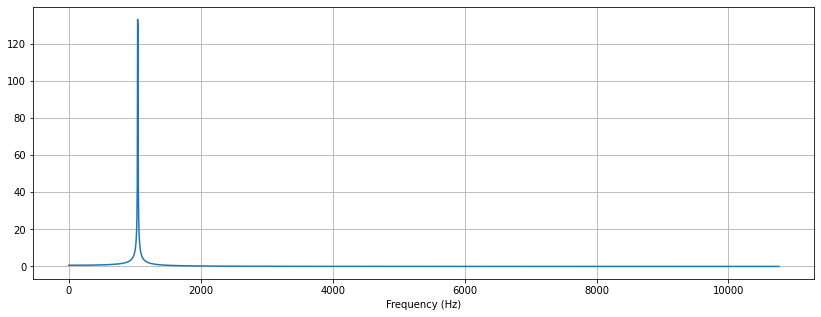

In [27]:
X = scipy.fft.fft(x[:4096])
X_mag = np.absolute(X)           # spectral magnitude
f = np.linspace(0, sr, 4096)     # frequency variable
plt.figure(figsize=(14, 5))
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.grid()

### Pure tone, D6

In [4]:
T = 2.0 # seconds
f0 = 1109.0
sr = 22050
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x2 = 0.1*np.sin(2*np.pi*f0*t)
print('Dimensions {}'.format(x.shape))

Dimensions (224760,)


In [5]:
ipd.Audio(x2, rate=sr)

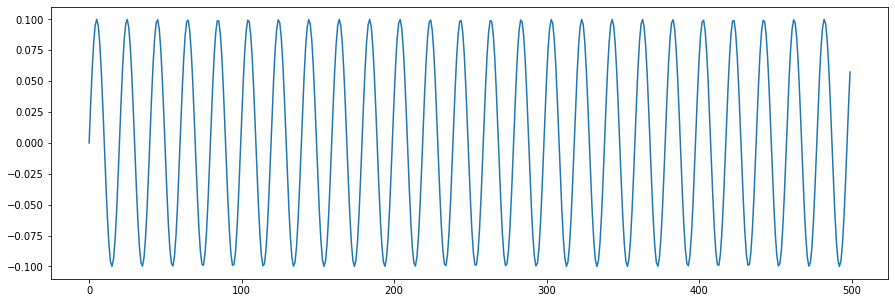

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(x2[0:500])
plt.show()

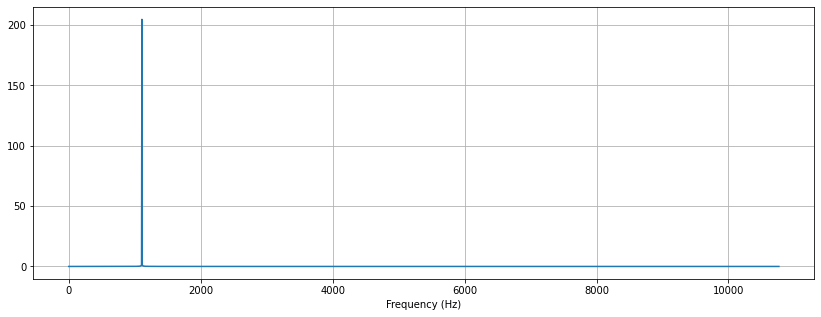

In [30]:
X = scipy.fft.fft(x2[:4096])
X_mag = np.absolute(X)           # spectral magnitude
f = np.linspace(0, sr, 4096)     # frequency variable
plt.figure(figsize=(14, 5))
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.grid()

## Adding both tones together

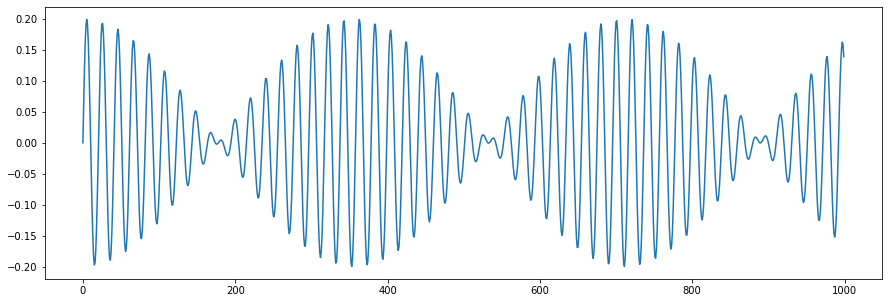

In [39]:
y = x + x2
plt.figure(figsize=(15, 5))
plt.plot(y[0:1000])
plt.show()

In [44]:
ipd.Audio(y, rate=sr)

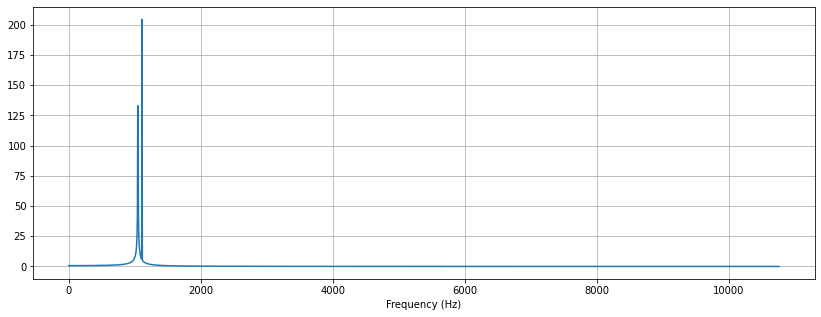

In [40]:
X = scipy.fft.fft(y[:4096])
X_mag = np.absolute(X)           # spectral magnitude
f = np.linspace(0, sr, 4096)     # frequency variable
plt.figure(figsize=(14, 5))
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.grid()

## Concatenate

In [6]:
T = .5 # seconds
f0 = 1047.0
f1 = 1109.0
f2 = 1175.0
sr = 22050
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x1 = 0.1*np.sin(2*np.pi*f0*t)
x2 = 0.1*np.sin(2*np.pi*f1*t)
x3 = 0.1*np.sin(2*np.pi*f2*t)
xmelody  = np.concatenate((x1, x2, x3)) 
print('Dimensions {}'.format(x.shape))

Dimensions (224760,)


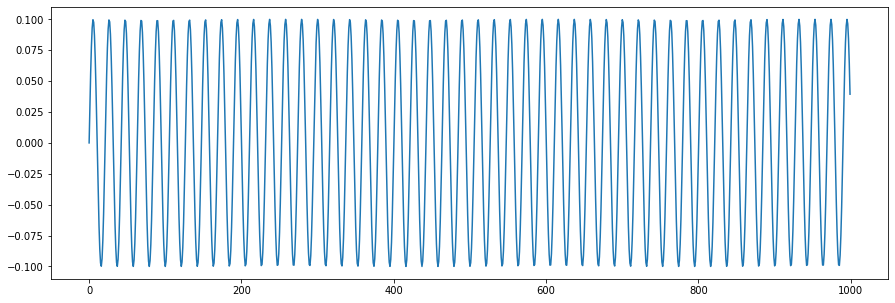

In [51]:
plt.figure(figsize=(15, 5))
plt.plot(xmelody[0:1000])
plt.show()

In [7]:
ipd.Audio(xmelody, rate=sr)

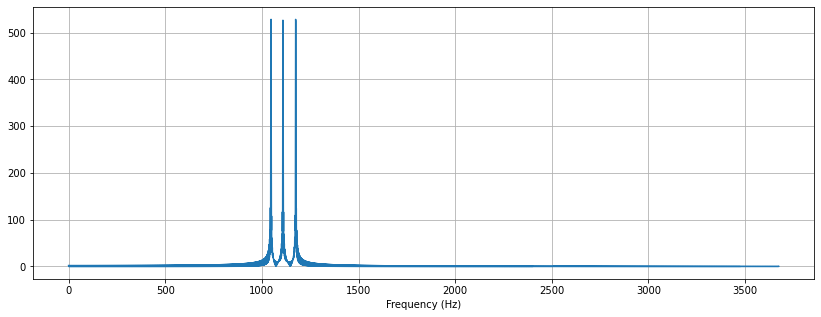

In [59]:
X = scipy.fft.fft(xmelody)
X_mag = np.absolute(X)             # spectral magnitude
f = np.linspace(0, sr, len(X))     # frequency variable
plt.figure(figsize=(14, 5))
plt.plot(f[:len(X)//6], X_mag[:len(X)//6]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.grid()

### Signal representation

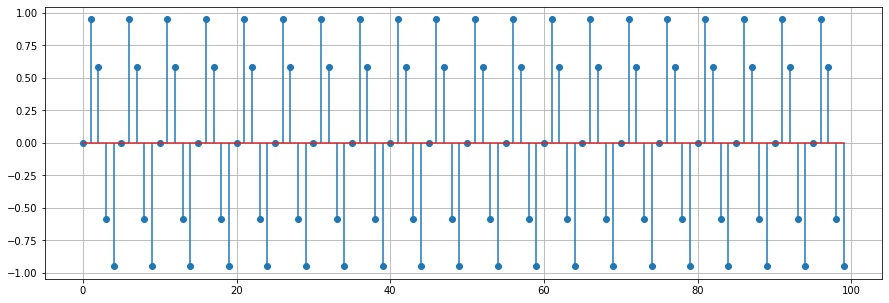

In [80]:
t = np.arange(100)
s = np.sin(0.2*2*np.pi*t)
plt.figure(figsize=(15, 5))
plt.stem(s)
plt.grid()
plt.show()

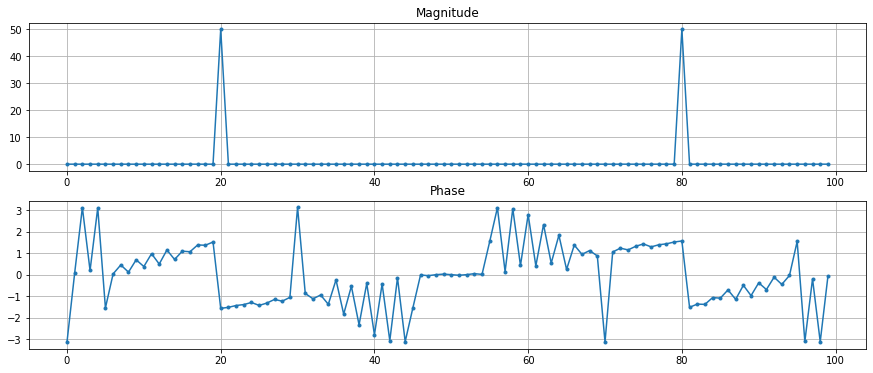

In [81]:
S = scipy.fft.fft(s)
S_mag = np.abs(S)     # Magnitude of a complex number
S_phase = np.angle(S) # Phase
fig, ax = plt.subplots(2,1,figsize=(15, 6))
ax[0].plot(t,S_mag,'.-')
ax[0].set_title('Magnitude')
ax[0].grid()
ax[1].plot(t,S_phase,'.-')
ax[1].set_title('Phase')
ax[1].grid()
plt.show()

#### Rearrange the array to center frequencies

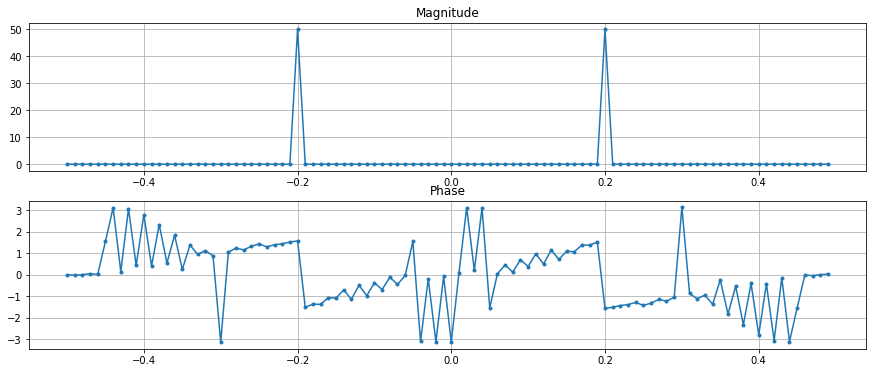

In [82]:
Fs = 1 # Hz
N = len(s)

Sshift = np.fft.fftshift(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)
Smag = np.abs(Sshift)
Sphase = np.angle(Sshift)

fig, ax = plt.subplots(2,1,figsize=(15, 6))
ax[0].plot(f,Smag,'.-')
ax[0].set_title('Magnitude')
ax[0].grid()
ax[1].plot(f,Sphase,'.-')
ax[1].set_title('Phase')
ax[1].grid()
plt.show()

### Nyquist

In [10]:
f = 20 # Hz
N = 200
t = np.linspace(0, 0.5, N)
x = np.sin(np.pi * f * t)

s_rate = 1/2*f # Hz. sampling frequency less than the requirement of sampling theorem
#s_rate = 50 # Hz. sr > twice the max. fs
s_rate = 100 # Hz. sr > twice the max. fs
#s_rate = 1000 # Hz. sr > twice the max. fs

T = 1 / s_rate
n = np.arange(0, 0.5 / T)
nT = n * T
xs = np.sin( np.pi * f * nT) # Since for sampling t = nT.

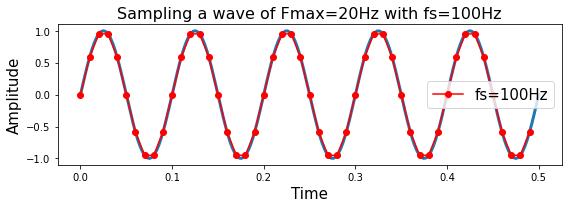

In [11]:
plt.figure(figsize=(8, 3))
plt.title("Sampling a wave of Fmax=20Hz with fs={}Hz".format(s_rate), fontsize=16)

#plt.subplot(2, 1, 1)
#plt.plot(t, x, linewidth=3)
#plt.xlabel('time.', fontsize=15)
#plt.ylabel('Amplitude', fontsize=15)
#plt.legend(fontsize=10, loc='upper right')

#plt.subplot(2, 1, 2)
plt.plot(t, x, linewidth=3 )
plt.plot(nT, xs, '-ro', label='fs={}Hz'.format(s_rate))
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=15, loc='right')

plt.tight_layout()